<a href="https://colab.research.google.com/github/SuhyeonHa/MatrixComputation/blob/master/Assignment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

1. Data

- generate a set of $m$ point pairs $\{ (x^{(i)}, y^{(i)}) \}_{i = 1}^m$ from random perturbations using `random` function based on a linear function that you define
- $\hat{y} = a x + b$ where $a, b \in \mathbb{R}$
- $y = \hat{y} + n$ where $n \sim \mathcal{N}(0, \sigma^2)$ is drawn from the normal distribution with mean $0$ and standard deviation $\sigma$
- you can choose $m, a, b$ and $\sigma > 0$

2. Linear Model

- $h_\theta(x) = \theta_0 + \theta_1 x$, $\quad$ where $\theta = (\theta_0, \theta_1)$ and $\theta_0, \theta_1 \in \mathbb{R}$

3. Objective Function

- $J(\theta) = \frac{1}{2 m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2$

4. Gradient Descent
 
- $\theta_0^{(t+1)} := \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})$
- $\theta_1^{(t+1)} := \theta_1^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}$
- you can choose a step-size (learning rate) $\alpha > 0$ in $\mathbb{R}$
- you can choose any initial conditions for $\theta_0^{(0)}$ and $\theta_1^{(0)}$

## Maching Learning Lecture
1.1 - 2.8

https://www.youtube.com/playlist?list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN

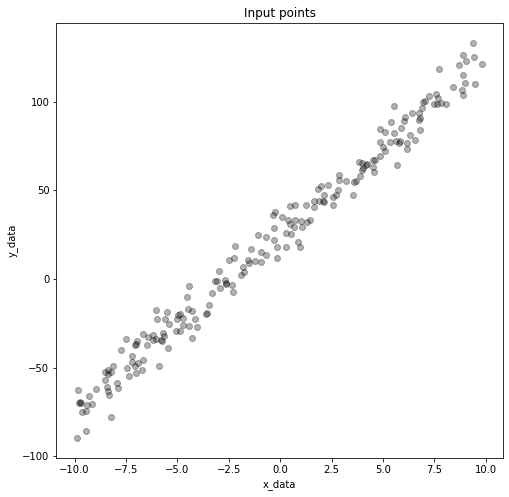

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Google drive mount
# 2. Copy a path of data.csv file with right-click
# 3. Paste it 'path' variable below
path = '/content/drive/My Drive/Colab Notebooks/MatrixComputation/data.csv'
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, alpha=0.3, c='k')
plt.xlabel('x_data')
plt.ylabel('y_data')
plt.title('Input points')
plt.show()

In [0]:
# linear regression #

In [0]:
# print(f'x_data {x_data}')
# print(f'y_data {y_data}')

In [0]:
def gradient0(x, y, num, theta0, theta1): # partial derivative by theta0
  h = theta0*x + theta1
  diff = np.zeros(num, dtype='float')
  result = 0.0
  # print(diff)
  # print(h)
  # print(y)
  diff = h - y
  # print(diff)
  for i in range(num):
    result += diff[i]
  # print(result)
  result /= num
  return result

In [0]:
def gradient1(x, y, num, theta0, theta1): # partial derivative by theta1
  h = theta0*x + theta1
  diff = np.zeros(num, dtype='float')
  result = 0.0
  # print(diff)
  # print(h)
  # print(y)
  diff = h - y
  # print(diff)
  # print(x)
  diff *= x
  # print(diff)
  for i in range(num):
    result += diff[i]
  # print(result)
  result /= num
  return result

In [0]:
def ObjFnc(x, y, a, b, num): # L2-norm between h(x) and y
  total = 0
  arr1 = a*x+b # h(x) = ax+b
  arr2 = y
  diff = np.zeros_like(arr1)
  # print(f'arr1 {arr1}')
  # print(f'arr2 {arr2}')
  # print(f'diff {diff}')
  diff = arr1 - arr2
  # print(diff)
  two = np.full(num, 2) # Make (num,) list filled with 2
  # print(f'sqr {two}')
  sqr = np.power(diff, two)
  # print(f'after sqr {sqr}')
  for i in range(num):
    total += sqr[i]
  # print(total)
  result = total/(2*m)
  return result

In [7]:
theta0 = 5.0 # parameter initilization
theta1 = 5.0
m = len(x_data)
itr = 100 # step_size
lr = 0.01 # learning_rate
cost_list = []
theta0_list = []
theta1_list = []
for i in range(itr): # gradient descent
  # print(f'iter {i}')
  # print(f'theta0 {theta0}')
  # print(f'theta1 {theta1}')
  cost_prev = ObjFnc(x_data, y_data, theta0, theta1, m)
  cost_list.append(cost_prev)
  theta0_list.append(theta0)
  theta1_list.append(theta1)
  # print(f'loss_prev {cost_prev}')
  grad0 = gradient0(x_data, y_data, m, theta0, theta1)
  grad1 = gradient1(x_data, y_data, m, theta0, theta1)
  temp0 = theta0 - lr*grad0
  temp1 = theta1 - lr*grad1
  # print(f'temp0 {temp0}')
  # print(f'temp1 {temp1}')
  cost_next = ObjFnc(x_data, y_data, temp0, temp1, m)
  # print(f'loss_next {cost_next}')
  if(cost_prev < cost_next): # repeat until convergence
    break
  else:
    theta0 = temp0
    theta1 = temp1

final_step = i
print(f'final_step {final_step}')
print(f'final_cost {cost_prev}')
#print(f'cost {cost_list}')
#print(f'theta0 {theta0_list}')
#print(f'theta1 {theta1_list}')

final_step 14
final_cost 245.59547547655527


In [8]:
new_a = theta0
new_b = theta1
print(f'new_a {new_a}')
print(f'new_b {new_b}')
new_y = theta0*x_data + theta1
# print(f'new_y {new_y}')

new_a 6.265566748783071
new_b 23.1822462887837


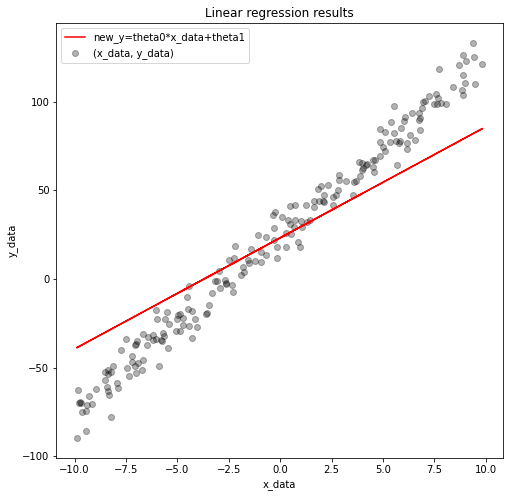

In [9]:
plt.figure(figsize=(8, 8))
plt.plot(x_data, new_y, c='r')
plt.scatter(x_data, y_data, alpha=0.3, c='k')
plt.xlabel('x_data')
plt.ylabel('y_data')
plt.title('Linear regression results')
plt.legend(['new_y=theta0*x_data+theta1', '(x_data, y_data)'])
plt.show()

In [0]:
set_theta0 = np.arange(-30, 30 ,0.1)
set_theta1 = np.arange(-30, 30 ,0.1)
set_theta0_len = len(set_theta0)
set_theta1_len = len(set_theta1)
# value_list = np.empty((set_theta0_len, set_theta1_len), dtype='float')
value_list = []

for i in range(set_theta0_len):
  for j in range(set_theta1_len):
    th0 = set_theta0[i]
    th1 = set_theta1[j]
    value = ObjFnc(x_data, y_data, th0, th1, m)
    # np.insert(value_list, (i, j), value)
    value_list.append(value)
    # print(f'i: {i}' f'j: {j}' f'th0: {th0}' f'th0: {th1}' f'value: {value}')

# print(f'i: {len(set_theta0)}' f'j: {len(set_theta1)}' f'value: {len(value_list)}')
Z = np.reshape(value_list, (set_theta0_len, set_theta1_len))

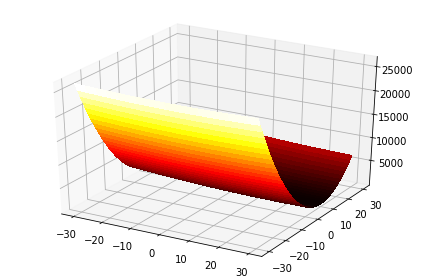

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(set_theta0, set_theta1)
surf = ax.plot_surface(X, Y, Z, cmap='hot', linewidth=0, antialiased=False)
# wire = ax.plot_wireframe(X, Y, Z, color='r', linewidth=0.1)
# fig.colorbar(surf,shrink=0.5,aspect=5)
fig.tight_layout()
plt.show()

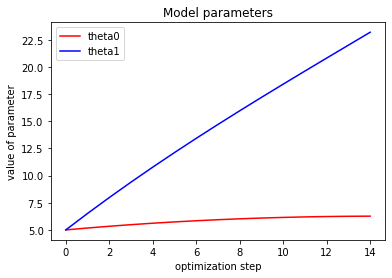

In [34]:
plt.plot(range(final_step+1), theta0_list, c='r')
plt.plot(range(final_step+1), theta1_list, c='b')
plt.xlabel('optimization step')
plt.ylabel('value of parameter')
plt.title('Model parameters')
plt.legend(['theta0', 'theta1'])
plt.show()

In [0]:
import numpy as np
from matplotlib import pyplot as plt

m = 10 # num of samples
a = 2
b = 3
std = 2

np.random.seed(1025)
x = np.linspace(-5,5,m)
y_hat = a*x + b
n = np.zeros_like(y_hat)